In [2]:
import numpy as np
from numpy.random import binomial
import math

def log(x):
	return math.log(x, 2)


#calculates entropy for given bernoullie distribution of rate p
def calculate_entropy(p):
	return -(p*log(p)+ (1-p)*log(1-p))


#visualization of entropy of a bernoullie random variable 
def Entropy_visual(maxVal):
    x=[]
    I = []
    for i in range(1, maxVal):
        I.append(i/maxVal)
        x.append(calculate_entropy(i/maxVal))
    return x, I

# Generate a sequence of binomial strings given an input length. Return type list 
def generate_sequence(Len, p):
	return binomial(n=1, p=p,size=Len)

def sample_mean_log_prob(sequence_vector, p):
	sum = 0
	for x in sequence_vector:
		sum += (log(p) if x==1 else log(1-p))
	return -sum/len(sequence_vector)

def generate_examples(num_ex, Len, p):
	X_ = []
	for i in range(num_ex):
		X_.append(generate_sequence(Len, p))
	return X_


def get_typical_set(X_train, epsilon, p):
	entropy = calculate_entropy(p)
	Typical_set = []
	else_set= []
	for x_train in X_train:
		if abs(sample_mean_log_prob(x_train, p)-entropy)<= epsilon:
			Typical_set.append(x_train)
		else:
			else_set.append(x_train)
	return Typical_set, else_set
	

# Entropy Visualization for a bernoullie random variable 

#### Number of points chosen for visualization = 500

Text(0, 0.5, 'Entropy H')

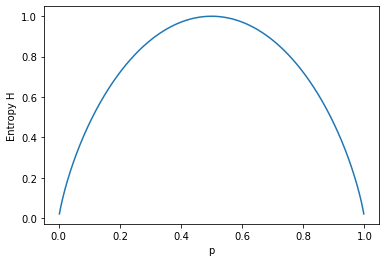

In [241]:
x, I = Entropy_visual(500)
plt.plot(I,x)
plt.xlabel("p")
plt.ylabel("Entropy H")

# Plotting Sample mean values for different 

It can be seen that as we increase the number variables in the sequence, then it moves closer and closer to the theoretical approximation values

In [242]:
Len1 = 50
Len2 = 100
Len3 = 1000
Len4 = 5000

fig = plt.figure()
x_1=[]
for i in I:
    x_1.append(sample_mean_log_prob(generate_sequence(Len1, i),i))
x_2=[]
for i in I:
    x_2.append(sample_mean_log_prob(generate_sequence(Len2, i),i))
x_3=[]
for i in I:
    x_3.append(sample_mean_log_prob(generate_sequence(Len3, i),i))
x_4=[]
for i in I:
    x_4.append(sample_mean_log_prob(generate_sequence(Len4, i),i))

<Figure size 432x288 with 0 Axes>

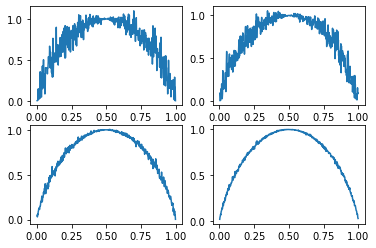

In [243]:
plt.subplot(2, 2, 1)
plt.plot(I,x_1)
plt.subplot(2, 2, 2)
plt.plot(I,x_2)
plt.subplot(2, 2, 3)
plt.plot(I,x_3)
plt.subplot(2, 2, 4)
plt.plot(I,x_4)

# Construction of Typical Set 
## Varying the value of epsilon and checking the size of typical set

* epsilon=0.1
* Len =  100
* num_ex=2000
* p=0.2

In [17]:
epsilon=0.1
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

1689
1937
2040
2048


In [18]:
epsilon=0.05
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

1009
1412
1756
1946


In [19]:
epsilon=0.01
Len =  [128, 256, 512, 1024]
num_ex=2048
p=0.2
Ty = []
El = []
for l in Len:
    X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
    TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
    Ty.append(TypSet)
    El.append(elseSet)
for i in range(4):
    print(len(Ty[i]))

392
373
457
577


## Varying the pmf "p" value and observing the size of Typical Set

In [22]:
TT = []
EE = []
PP = [0.02*i for i in range(1, 50)]
for p in PP:
    epsilon=0.1
    Len = [128, 256, 512, 1024]
    num_ex=2000
    Ty = []
    El = []
    for l in Len:
        X_ = generate_examples(num_ex=num_ex, p=p, Len=l)
        TypSet, elseSet  = get_typical_set(X_, epsilon=epsilon, p=p)
        Ty.append(TypSet)
        El.append(elseSet)
    TT.append(Ty)
    EE.append(El)

In [23]:
for j in range(4):
    st = ""
    for i in range(len(TT)):
        st=st+str(len(TT[i][j]))+" "
    print(st)
        

1621 1491 1470 1464 1539 1553 1484 1567 1578 1614 1708 1753 1831 1857 1921 1956 1970 1993 1997 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 1995 1995 1971 1950 1916 1890 1819 1754 1717 1647 1593 1555 1496 1549 1556 1475 1439 1503 1631 
1931 1847 1826 1779 1798 1825 1849 1852 1881 1896 1935 1944 1964 1979 1990 1997 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 1998 1997 1994 1985 1974 1950 1938 1900 1880 1845 1823 1845 1812 1804 1849 1846 1902 
1987 1981 1965 1956 1971 1969 1978 1984 1985 1987 1994 1998 1999 1999 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 1998 2000 1997 1991 1984 1975 1966 1968 1961 1968 1967 1963 1991 
1999 2000 2000 2000 1997 1997 1999 1998 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 1999 1999 2000 1998 1998 1998 1999 1999 
